# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as axes

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv(r'C:\Users\Adm\Downloads\SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [3]:
sinasc_raw[['IDADEMAE','IDADEPAI','munResNome']].groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [4]:
df_niver = sinasc_raw[['DTNASC', 'PESO', 'SEXO', 'ESCMAE']]

In [5]:
e_meu_niver = lambda data: data[-5:] == '07-11' 

df_niver = df_niver[df_niver['DTNASC'].apply(e_meu_niver)] #Filtro

In [6]:
df_niver.pivot_table(values='PESO', index=['ESCMAE', 'SEXO'])

PESO
ESCMAE          SEXO                  
1 a 3 anos      Feminino   3052.500000
12 anos ou mais Feminino   3455.000000
                Masculino  3270.714286
4 a 7 anos      Feminino   2859.800000
                Masculino  3138.750000
8 a 11 anos     Feminino   3262.240000
                Masculino  3405.904762

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [7]:
#Qual mun nasceu menos bebês em 2019?
count_nasc_mun = sinasc_raw[['munResNome', 'IDADEMAE']].groupby('munResNome').count()
count_nasc_mun.sort_values('IDADEMAE').head(3)

,IDADEMAE
munResNome,
Município ignorado - RO,1
Castanheiras,32
Pimenteiras do Oeste,40


In [8]:
#Resposta: como o menor é um município não identitifacodo, vamos considerar o segundo como menor!
count_nasc_mun.sort_values('IDADEMAE').drop('Município ignorado - RO')[:1]

,IDADEMAE
munResNome,
Castanheiras,32


In [9]:
#qual a idade media, maxima, minima das maes nesse municipio?
mun_castanh_m = sinasc_raw[['IDADEMAE', 'munResNome']]
mun_castanh_m = mun_castanh_m[mun_castanh_m['munResNome'] == 'Castanheiras']

In [10]:
mun_castanh_m.groupby('munResNome').agg([('Média', 'mean'), ('Máximo', max), ('Mínimo', min)])

IDADEMAE              
                 Média Máximo Mínimo
munResNome                          
Castanheiras  27.28125     39     17

In [11]:
#qual a idade media, maxima, minima dos pais nesse municipio?

In [12]:
mun_castanh_p = sinasc_raw[['IDADEPAI', 'munResNome']]
mun_castanh_p = mun_castanh_p[mun_castanh_p['munResNome'] == 'Castanheiras']

In [13]:
mun_castanh_p.groupby('munResNome').agg([('Média', 'mean'), ('Máximo', max), ('Mínimo', min)])

IDADEPAI              
                  Média Máximo Mínimo
munResNome                           
Castanheiras  30.392857   43.0   17.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [14]:
#Qual o municipio que nasceu mais bebe no mês de março?
mun_bb_marco = sinasc_raw[['munResNome', 'DTNASC', 'QTDFILVIVO', 'IDADEMAE', 'IDADEPAI']]
mun_bb_marco = mun_bb_marco[mun_bb_marco['DTNASC']
               .apply(lambda data: data[-5:-3] == '03')
                ]

mun_bb_marco['count'] = True

In [15]:
mun_bb_marco[['munResNome','count']].groupby('munResNome').sum().sort_values('count', ascending=False)[:1]

,count
munResNome,
Porto Velho,744


In [16]:
#qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
filtrado_PV = mun_bb_marco[mun_bb_marco['munResNome'] == 'Porto Velho']

mun_fvivos_PV = filtrado_PV[['munResNome', 'QTDFILVIVO']]
mun_fvivos_PV.groupby('munResNome').agg([('Média','mean'), ('Máximo', max), ('Mínimo', min)])

QTDFILVIVO              
                 Média Máximo Mínimo
munResNome                          
Porto Velho   1.295056    9.0    0.0

In [17]:
#qual a idade media, maxima, minima dos pais nesse municipio?
pai_mae_PV = filtrado_PV[['IDADEPAI', 'IDADEMAE', 'munResNome']]

pai_mae_PV.groupby('munResNome').agg([('Média','mean'), ('Máximo', max), ('Mínimo', min)])

IDADEPAI                 IDADEMAE              
                 Média Máximo Mínimo      Média Máximo Mínimo
munResNome                                                   
Porto Velho  34.629032   62.0   19.0  26.596774     44     14

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

### Insight 1 - Idades de mães e pais por município 

In [18]:
mean_idades = sinasc_raw[['IDADEMAE','IDADEPAI','munResNome']].groupby('munResNome').mean()
mean_ordem_mae = mean_idades.sort_values('IDADEMAE') #Ordenamento relativo às idades das mães
mean_ordem_pai = mean_idades.sort_values('IDADEPAI') #Ordenamento relativo às idades dos pais

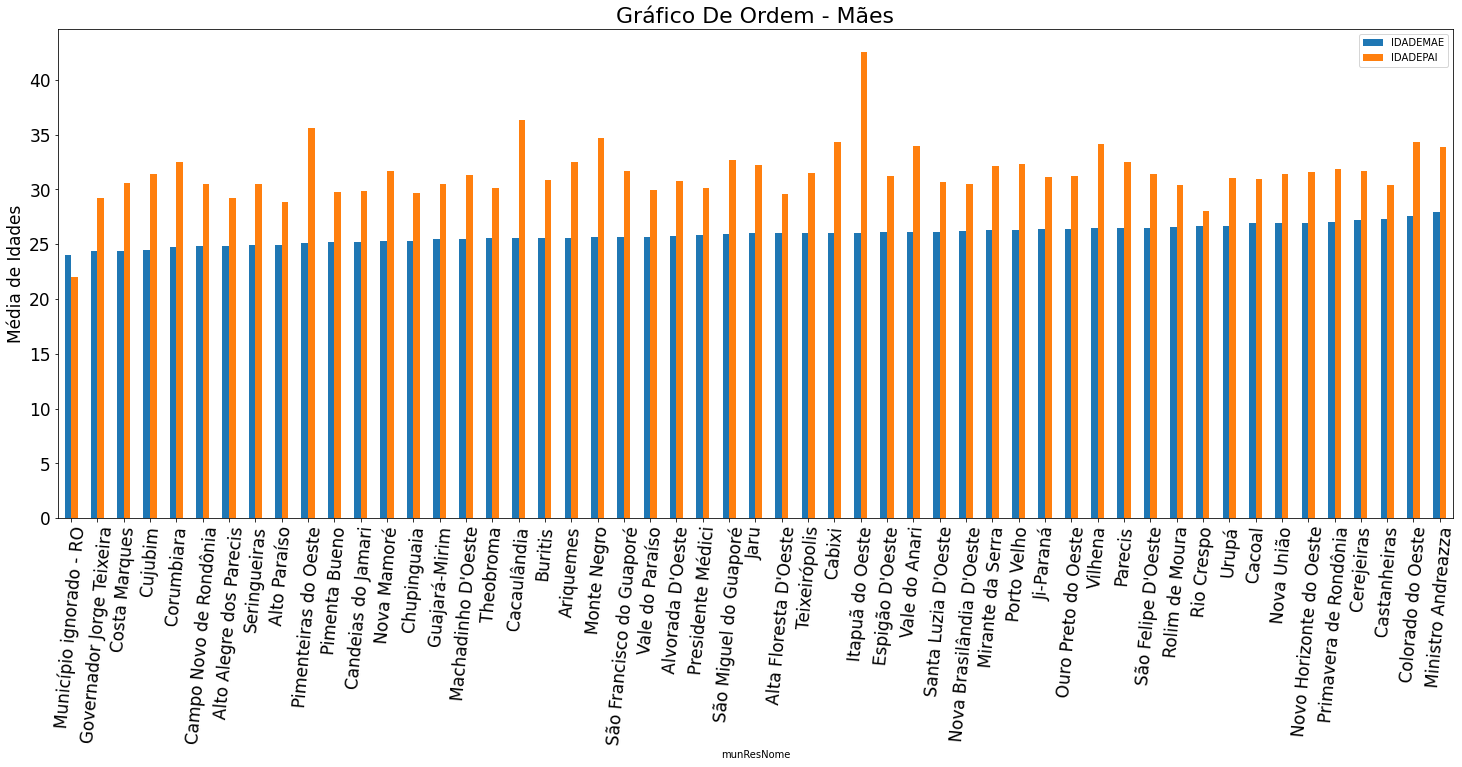

In [19]:
mean_ordem_mae.plot(kind='bar', figsize=(25, 9))
plt.title("Gráfico De Ordem - Mães", fontdict={'fontsize':22})
plt.ylabel("Média de Idades", fontdict={'fontsize':17})
plt.xticks(rotation=85)
plt.tick_params(labelsize=17);

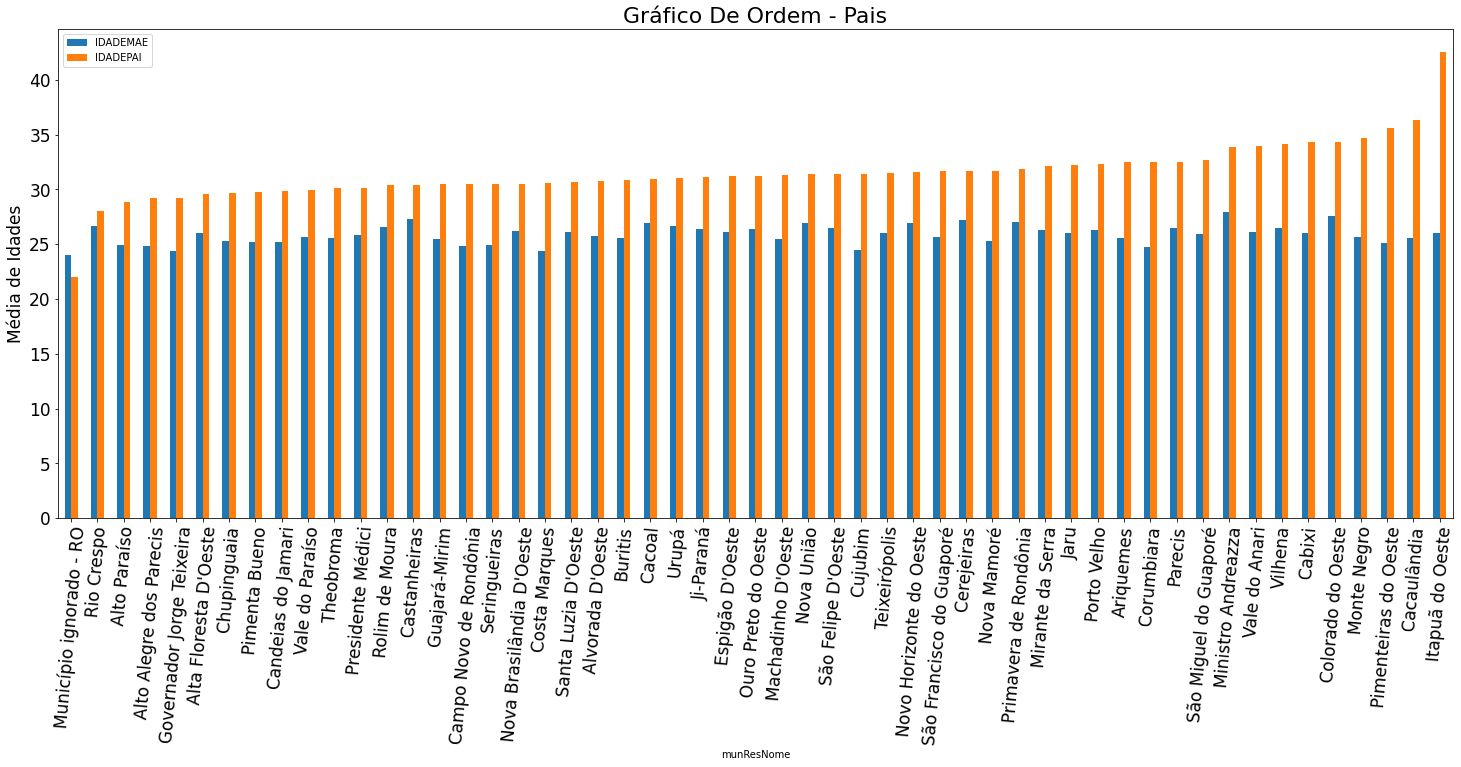

In [20]:
mean_ordem_pai.plot(kind='bar', figsize=(25, 9))
plt.title("Gráfico De Ordem - Pais", fontdict={'fontsize':22})
plt.ylabel("Média de Idades", fontdict={'fontsize':17})
plt.xticks(rotation=85)
plt.tick_params(labelsize=17);

**Vamos às informações que foram extraídas:**
* Percebe-se que a figura paterna apresenta-se sempre mais velha à figura materna, com excessão de um dado anômalo, cujo município é aquele não identificado (Município ignorado);
* As médias de idades das figuras paternas variam bem mais entre os municípios que às de figura materna, enquanto esta apresenta uma média quase constante no valor de 25 anos de idade, quase porque poucos municípios estão a margem de 28 anos;
* Variação da média das idades da figura paterna está entre 28 a 40 anos.

Importante se faz lembrar que aos dados utilizados nesse gráfico foi aplicado o tratamento de drop de dados faltantes e que a variável 'IDADEPAI' é uma das colunas com mais dados ausentes, o que ocasiona um maior risco de interpretação tendenciosa. 


### Insight 2 - Contagem de nascimento por município

In [28]:
count_nasc_mun.rename(columns={'IDADEMAE': 'Count'}, inplace=True)

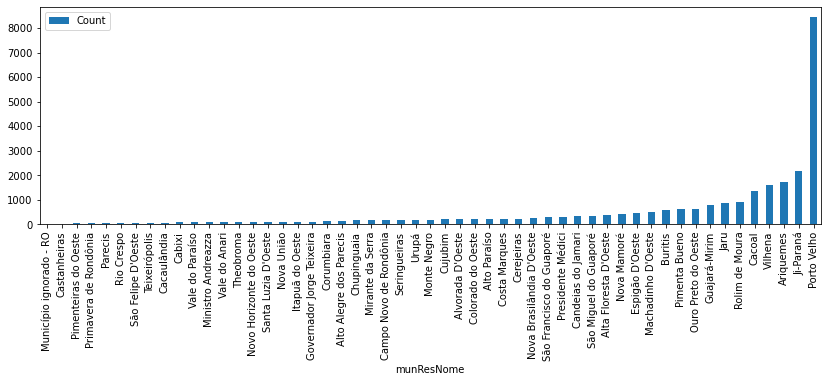

In [38]:
count_nasc_mun.sort_values('Count').plot(kind='bar', figsize=(14, 4));

**Vamos às informações que foram extraídas:**
* A quantidade de nascimentos por município é proporcional ao número de habitantes por município. A referência de comparação que corrobora com este insight se encontra seguinte fonte: https://www.estadosecidades.com.br/ro/#:~:text=O%20estado%20de%20Rond%C3%B4nia%20tem%20como%20capital%20Porto,v%C3%ADdeo%20contando%20a%20hist%C3%B3ria%20do%20estado%20de%20Rond%C3%B4nia.
* Diante disso, infiro que há relação de causalidade entre o número da população por município e a quantidade de nascimento, pois, obviamente, quanto mais gente há, maior é a procriação.

In [22]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [23]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [24]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')